In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Cargamos los archivos excel
data_train = pd.read_excel("E-Commerce_train.xlsx")
data_test = pd.read_excel("E-Commerce_test.xlsx")

In [4]:
print(data_test.shape, data_train.shape)

(2000, 11) (8999, 12)


In [5]:
data_train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [6]:
data_test.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
0,9000,F,Ship,5,1,189,2,medium,M,10,5248
1,9001,D,Ship,5,3,150,2,high,F,9,4446
2,9002,F,Ship,3,3,200,3,low,M,3,5739
3,9003,A,Ship,5,1,133,2,medium,M,1,4643
4,9004,B,Ship,4,2,260,3,low,M,4,5504


**Analisis de valores faltantes:**
*No hay valores faltantes!*

In [7]:
#Chequeamos la existencia de valores nulos por columna en train
data_train.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [8]:
#Chequeamos la existencia de valores nulos por columna en test
data_test.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
dtype: int64

**Analisis de valores atipicos**

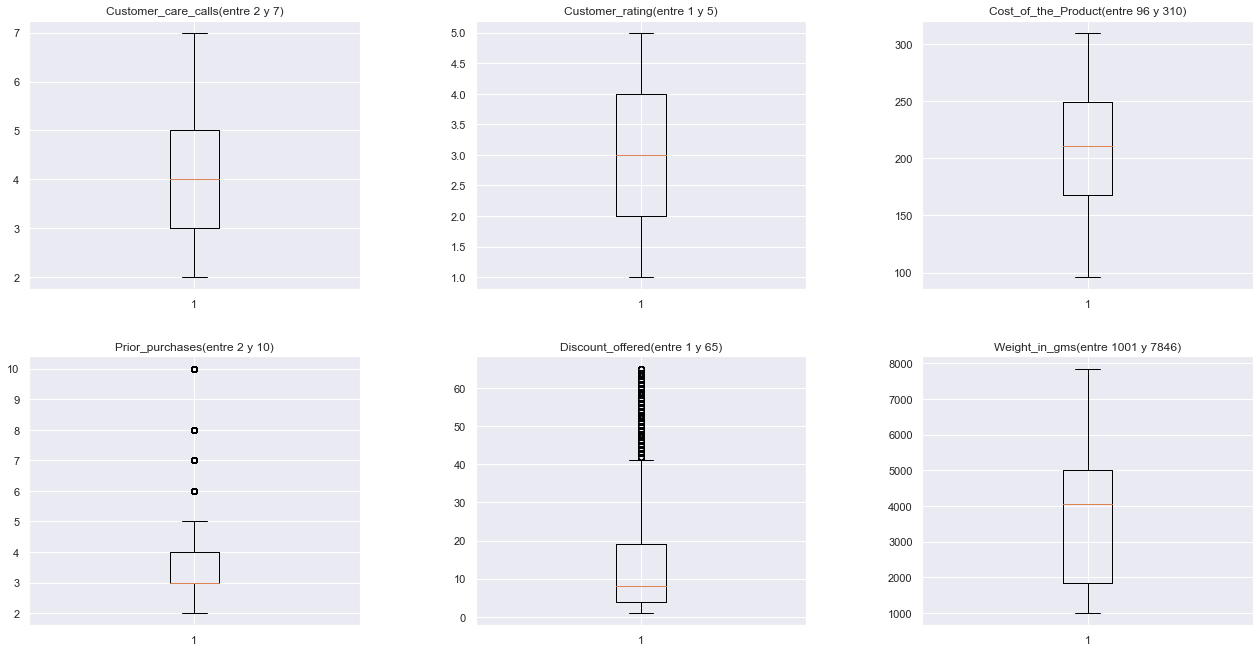

In [9]:
#Graficamos boxplots
fig, axes = plt.subplots(2,3, figsize=(20,10))

axes[0, 0].boxplot(data_train['Customer_care_calls'])
axes[0, 0].grid(True)

axes[0, 1].boxplot(data_train['Customer_rating'])
axes[0, 1].grid(True)

axes[0, 2].boxplot(data_train['Cost_of_the_Product'])
axes[0, 2].grid(True)

axes[1, 0].boxplot(data_train['Prior_purchases'])
axes[1, 0].grid(True)

axes[1, 1].boxplot(data_train['Discount_offered'])
axes[1, 1].grid(True)

axes[1, 2].boxplot(data_train['Weight_in_gms'])
axes[1, 2].grid(True)

axes[0, 0].set_title("Customer_care_calls(entre 2 y 7)")
axes[0, 1].set_title("Customer_rating(entre 1 y 5)")
axes[0, 2].set_title("Cost_of_the_Product(entre 96 y 310)")
axes[1, 0].set_title("Prior_purchases(entre 2 y 10)")
axes[1, 1].set_title("Discount_offered(entre 1 y 65)")
axes[1, 2].set_title("Weight_in_gms(entre 1001 y 7846)")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

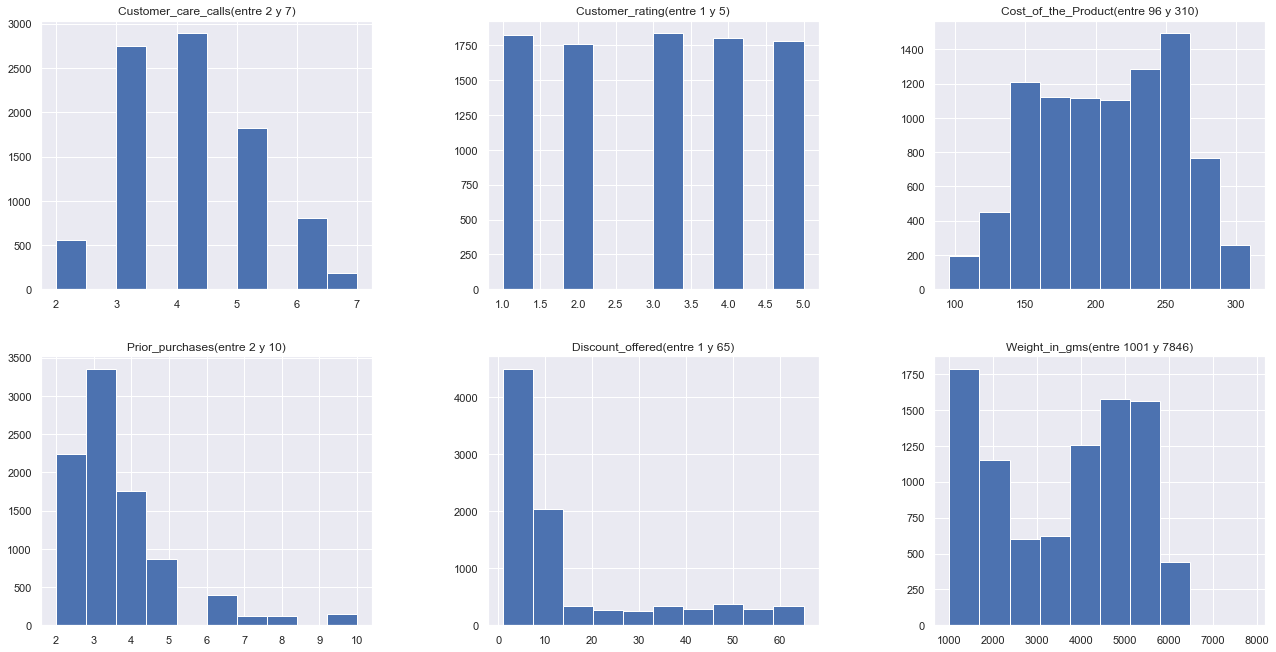

In [10]:
#Graficamos histogramas
fig, axes = plt.subplots(2,3, figsize=(20,10))

axes[0, 0].hist(data_train['Customer_care_calls'])
axes[0, 0].grid(True)

axes[0, 1].hist(data_train['Customer_rating'])
axes[0, 1].grid(True)

axes[0, 2].hist(data_train['Cost_of_the_Product'])
axes[0, 2].grid(True)

axes[1, 0].hist(data_train['Prior_purchases'])
axes[1, 0].grid(True)

axes[1, 1].hist(data_train['Discount_offered'])
axes[1, 1].grid(True)

axes[1, 2].hist(data_train['Weight_in_gms'])
axes[1, 2].grid(True)

axes[0, 0].set_title("Customer_care_calls(entre 2 y 7)")
axes[0, 1].set_title("Customer_rating(entre 1 y 5)")
axes[0, 2].set_title("Cost_of_the_Product(entre 96 y 310)")
axes[1, 0].set_title("Prior_purchases(entre 2 y 10)")
axes[1, 1].set_title("Discount_offered(entre 1 y 65)")
axes[1, 2].set_title("Weight_in_gms(entre 1001 y 7846)")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
plt.show()

**Parece no haber valores numericos fuera de los esperados**

Pasamos a revisar valores no numericos

In [11]:
#Imprimimos los valores unicos de cada columna no numerica y los comparamos con la documentacion provista
print(pd.unique(data_train[["Warehouse_block"]].values.ravel('K')), "Columna Warehouse_block: desde A hasta F ")
print(pd.unique(data_train[["Mode_of_Shipment"]].values.ravel('K')), "Columna Mode_of_Shipment: Flight, Road, Ship ")
print(pd.unique(data_train[["Product_importance"]].values.ravel('K')), "Columna Product_importance: Low, Medium, High ")
print(pd.unique(data_train[["Gender"]].values.ravel('K')), "Columna Gender: F, M ")

['D' 'F' 'A' 'B' 'C'] Columna Warehouse_block: desde A hasta F 
['Flight' 'Ship' 'Road'] Columna Mode_of_Shipment: Flight, Road, Ship 
['low' 'medium' 'high'] Columna Product_importance: Low, Medium, High 
['F' 'M'] Columna Gender: F, M 


No hay valores atipicos en las columnas no numericas

**Procedemos a codificar las variables categoricas**

In [12]:
data_train["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_train["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_train["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_train["Gender"].replace({"F":0, "M":1},inplace= True)


In [13]:
data_test["Warehouse_block"].replace({"A":0, "B":1, "C":2,"D":3, "F": 4}, inplace=True)
data_test["Mode_of_Shipment"].replace({"Flight":0, "Ship":1, "Road":2},inplace= True)
data_test["Product_importance"].replace({"low":0, "medium":1,"high":2},inplace= True)
data_test["Gender"].replace({"F":0, "M":1},inplace= True)

Diagramamos las variables de salida

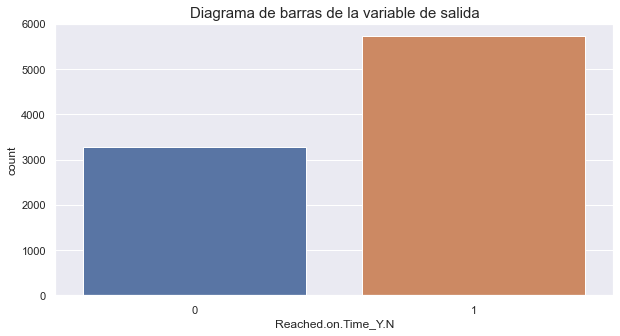

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'Reached.on.Time_Y.N' ,label= 'Count', data = data_train)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

Definimos los datos de entrenamiento y testeo

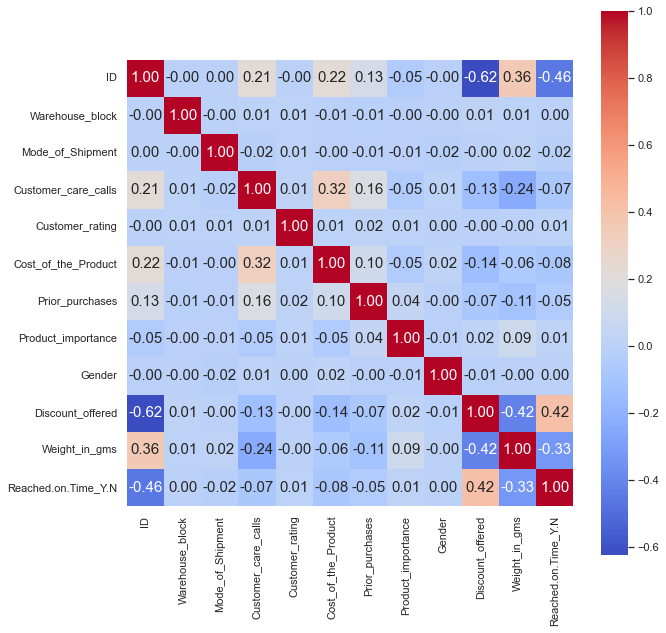

In [15]:

corr = data_train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square=True, annot=True, fmt='.2f', annot_kws={'size': 15}, xticklabels= data_train.columns, yticklabels= data_train.columns, cmap='coolwarm')
plt.show()

No hay correlaciones significantes. Sin embargo decartamos la columna ID porque no aporta informacion a la problematica

In [16]:
data_train.drop(columns="ID", inplace=True)

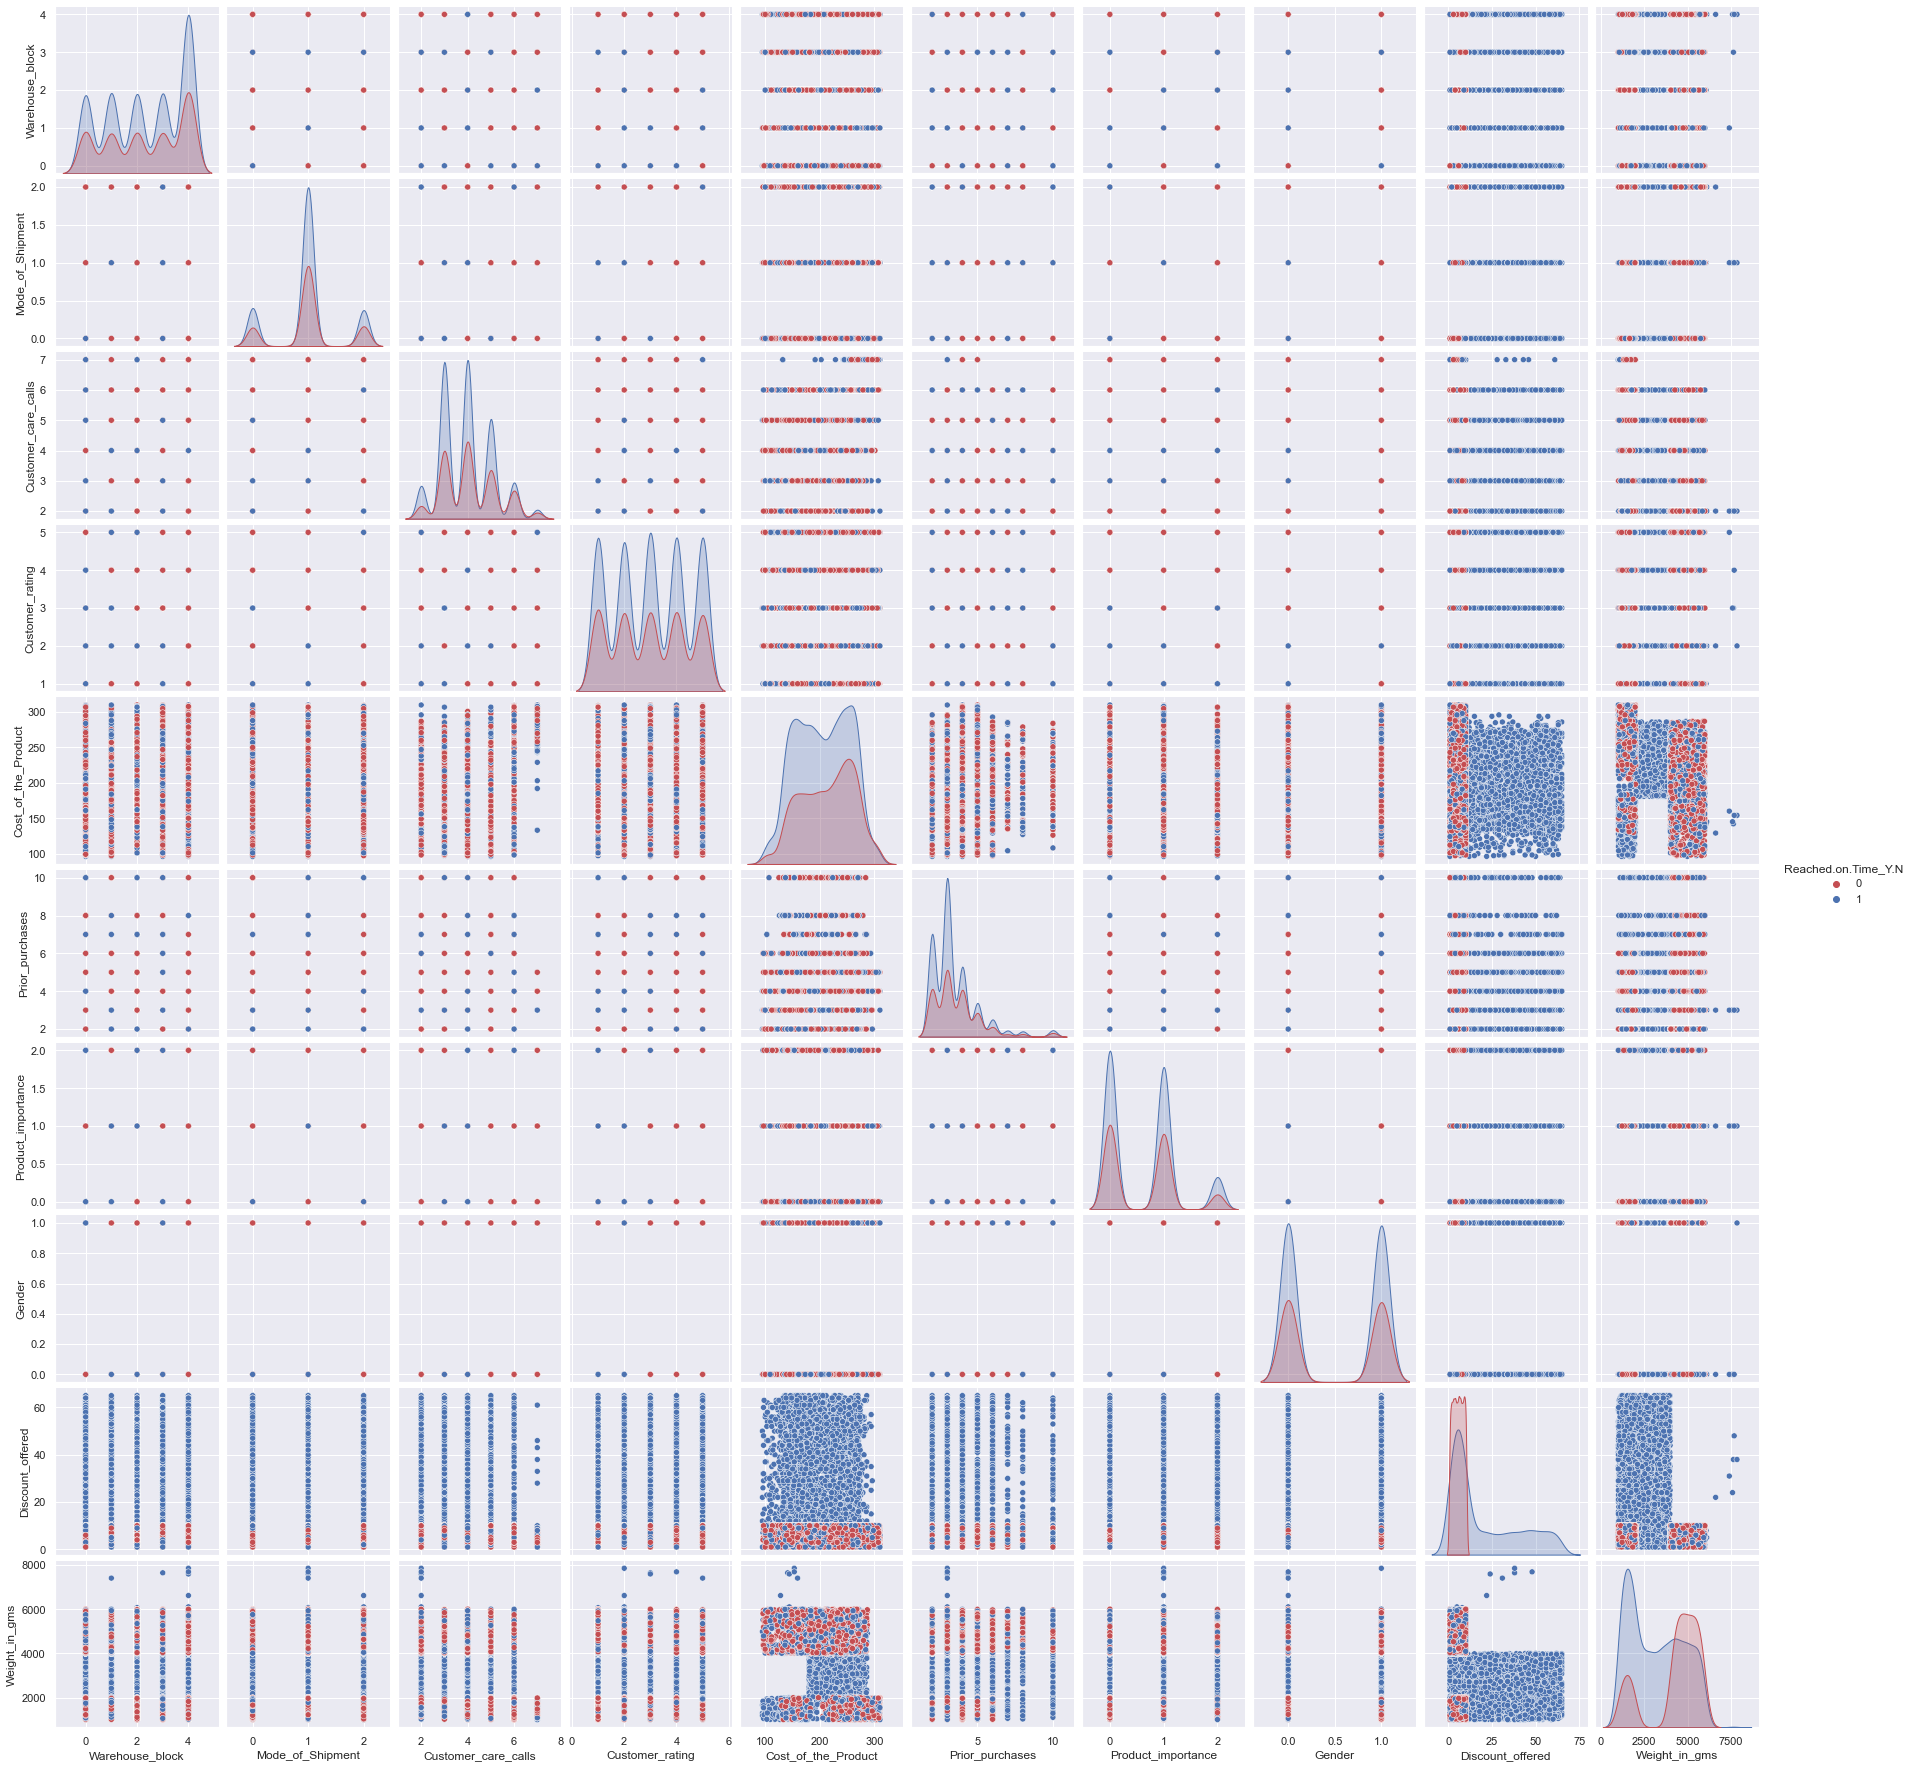

In [17]:
sns.pairplot(data_train, hue="Reached.on.Time_Y.N", palette = ['r', 'b'])
plt.show()

Me gusta el patron que veo entre Discount_offered y Cost_of_the_Product por lo tanto procedo a experimentar con algoritmos de clasificacion y regresion.

In [20]:
data_train

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,0,4,2,177,3,0,0,44,1233,1
1,4,0,4,5,216,2,0,1,59,3088,1
2,0,0,2,2,183,4,0,1,48,3374,1
3,1,0,3,3,176,4,1,1,10,1177,1
4,2,0,2,2,184,3,1,0,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...
8994,3,1,3,1,217,3,0,0,1,4177,1
8995,4,1,5,3,232,3,1,1,3,4526,0
8996,0,1,4,5,260,3,1,0,6,4221,0
8997,1,1,4,2,184,3,1,0,5,5931,1


In [21]:
from sklearn.model_selection import train_test_split

In [22]:

X = data_train[["Cost_of_the_Product","Discount_offered"]]
y = data_train["Reached.on.Time_Y.N"]

In [23]:
 X.head()

,Cost_of_the_Product,Discount_offered
0,177,44
1,216,59
2,183,48
3,176,10
4,184,46


In [24]:
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=60, stratify=y)
print('Proporcion de etiquetas positiva en los datos de Train:', y_train.sum()/y_train.size)
print('Proporcion de etiquetas positiva en los datos de Train:', y_test.sum()/y_test.size)

Proporcion de etiquetas positiva en los datos de Train: 0.6355105568588715
Proporcion de etiquetas positiva en los datos de Train: 0.6355555555555555


C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


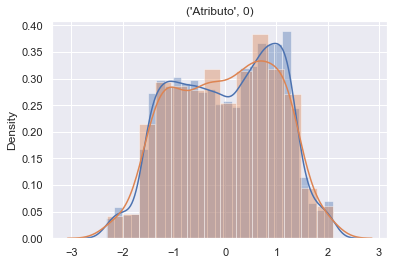

C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\gomez\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


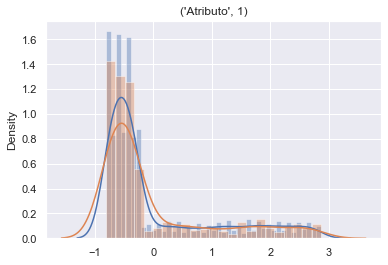

In [26]:
for i in range(X_train.shape[1]):
    sns.distplot(x = X_train[:,i])
    sns.distplot(x = X_test[:,i])
    titulo = 'Atributo', i
    plt.title(titulo)
    plt.show()

In [30]:
# Instanciamos un objeto de la clase DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(max_depth=None, random_state = 42)

In [32]:
# Entrenamos el modelo
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [33]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = tree.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.7989875293246079
Accuracy sobre conjunto de Test: 0.6688888888888889


In [34]:
# Exploramos algunas de las características del modelo entrenado.
print(tree.classes_, " Posibles respuestas")
print(tree.n_classes_, " Numero de posibles respuestas")
print(tree.max_features_, " Numero de entradas")
print(tree.feature_importances_," Relevancia de cada entrada")

[0 1]  Posibles respuestas
2  Numero de posibles respuestas
2  Numero de entradas
[0.32011127 0.67988873]  Relevancia de cada entrada


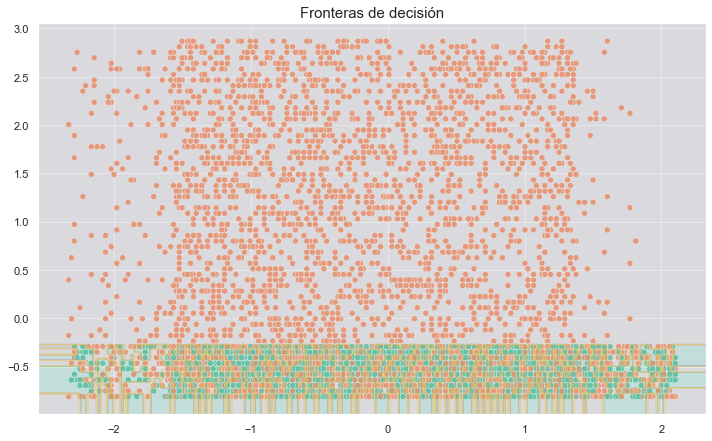

In [36]:
plt.figure(figsize= (10,6))


ax = sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue= y_train, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
plt.title('Fronteras de decisión', fontsize= 15)
plt.show()

Como podemos observar se asemeja mucho al patron interpretado en el pairplot lo cual es un buen comienzo

Probemos algo distinto

In [37]:
#Instanciamos el modelo de Kvecinos
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [38]:

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [39]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = knn.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = knn.predict(X_test)

# Comparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.7612050870477837
Accuracy sobre conjunto de Test: 0.65


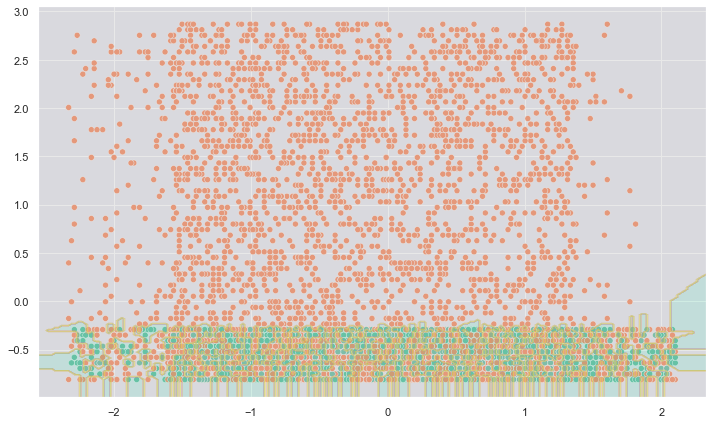

In [40]:
plt.figure(figsize= (10,6))
ax = sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue=y_train, palette='Set2')
plt.legend().remove()


xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.tight_layout()
# plt.savefig('arbol_iris.png', dpi = 400)
plt.show()

Este quedo medio raro :/
Por el momento seguimos trabajando con la optimizacion de hiperparametros para ponerlo a punto!

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
tree = DecisionTreeClassifier()
tree_scores = cross_val_score(tree, X, y, cv=5)

knn = KNeighborsClassifier(n_neighbors=1)
knn_scores = cross_val_score(knn, X, y, cv=5)

In [43]:
print(tree_scores)
print(knn_scores)

[0.77277778 0.77888889 0.70888889 0.445      0.43246248]
[0.73666667 0.76388889 0.69888889 0.48166667 0.49805447]


In [44]:
print("Accuracy para Tree: %0.2f (+/- %0.2f)" % (tree_scores.mean(), tree_scores.std() * 2))
print("Accuracy para KNN: %0.2f (+/- %0.2f)" % (knn_scores.mean(), knn_scores.std() * 2))

Accuracy para Tree: 0.63 (+/- 0.31)
Accuracy para KNN: 0.64 (+/- 0.24)


In [45]:
from sklearn.model_selection import cross_validate

In [46]:
tree_scores = cross_validate(tree, X, y, cv=5, scoring = ['precision','recall'])
knn_scores = cross_validate(knn, X, y, cv=5, scoring = ['precision','recall'])

In [47]:
print(tree_scores)

{'fit_time': array([0.00699735, 0.00650072, 0.00649834, 0.00749969, 0.00600076]), 'score_time': array([0.00250101, 0.00250053, 0.00250173, 0.00199842, 0.00249863]), 'test_precision': array([0.77081798, 0.78103837, 0.77268722, 0.63551402, 0.61612284]), 'test_recall': array([0.91433566, 0.90734266, 0.76660839, 0.2972028 , 0.2808399 ])}


In [48]:
print(knn_scores)

{'fit_time': array([0.00450039, 0.00399852, 0.00350094, 0.00399923, 0.00350022]), 'score_time': array([0.03899908, 0.03450179, 0.14949965, 0.03250098, 0.03300142]), 'test_precision': array([0.73008242, 0.75550817, 0.7411859 , 0.63754889, 0.63452915]), 'test_recall': array([0.9291958 , 0.9291958 , 0.80856643, 0.42744755, 0.4951881 ])}


Obtuvimos un recall de alrededor de 0.9 en ambos casos lo cual no esta nada mal. Pero optimizando los hiperparametros y/o ensamblando los algoritmos podemos crear algo mejor... supongo

**OPTIMIZACION DE HIPERPARAMETROS //GRIDSEARCH//**

In [49]:
# Creamos el diccionario de hiperparámetros para el modelo de Kvecinos

param_grid = {'n_neighbors':np.arange(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':[1,3,5,7,9],
              'algorithm':['auto', 'kd_tree']}

In [50]:
#Aqui evaluaremos nuestro modelo Kvecinos en repetidas ocasiones cambiandole todos los hiperparametros lo cual hara que nuestra pc explote.
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()
model = GridSearchCV(knn, param_grid=param_grid, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'kd_tree'],
                         'leaf_size': [1, 3, 5, 7, 9],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']})

In [51]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(3)

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 2, 'weights': 'distance'}
Mejor Score: 0.6500789238899183



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.0064,0.000199,0.029200,0.000246,auto,1,1,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.648765,0.649383,0.654321,0.644444,0.638048,0.646992,0.005460,211
1,0.0062,0.000245,0.003201,0.000245,auto,1,1,distance,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.648765,0.649383,0.654321,0.644444,0.638048,0.646992,0.005460,211
2,0.0063,0.000245,0.030400,0.000374,auto,1,2,uniform,"{'algorithm': 'auto', 'leaf_size': 1, 'n_neigh...",0.645679,0.661728,0.657407,0.648765,0.630636,0.648843,0.010779,47


In [53]:
#Predecimos en los datos del test con el mejor modelo obtenido
prediction = model.predict(X_test)

In [54]:
#Matriz de confusion / La usaremos para obtener resultados sobre nuestro modelo (Precision y Recall)
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test,prediction)
print("Matriz de confusion: \n ", cm)
print("verdaderos positivos:239 \nfalsos positivos:89 \nfalsos negativos:220 \nverdaderos negativos:352")

Matriz de confusion: 
  [[239  89]
 [220 352]]
verdaderos positivos:239 
falsos positivos:89 
falsos negativos:220 
verdaderos negativos:352


In [55]:
# Reporte de Clasificacion

from sklearn.metrics import classification_report

report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.73      0.61       328
           1       0.80      0.62      0.69       572

    accuracy                           0.66       900
   macro avg       0.66      0.67      0.65       900
weighted avg       0.70      0.66      0.66       900



**OPTIMIZACION DE HIPERPARAMETROS //RANDOMSEARCH//**

In [56]:
# Diccionario para random search

import scipy as sp

param_dist = {'n_neighbors':sp.stats.randint(1, 20),
              'weights': ['uniform', 'distance'], 
              'leaf_size':sp.stats.randint(1, 10),
              'algorithm':['auto', 'kd_tree']}

In [57]:
#Explotamos el pc 2 pero con una busqueda aleatoria
from sklearn.model_selection import RandomizedSearchCV
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, param_dist,n_iter=100, random_state=0,cv=5)
model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=100,
                   param_distributions={'algorithm': ['auto', 'kd_tree'],
                                        'leaf_size': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F44485DE80>,
                                        'n_neighbors': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001F44485D340>,
                                        'weights': ['uniform', 'distance']},
                   random_state=0)

In [58]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(3)

Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 9, 'n_neighbors': 2, 'weights': 'distance'}
Mejor Score: 0.6500789238899183



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005101,0.000198,0.002498,0.000317,auto,6,1,distance,"{'algorithm': 'auto', 'leaf_size': 6, 'n_neigh...",0.650617,0.651852,0.655556,0.644444,0.639284,0.648351,0.005775,27
1,0.005199,0.000245,0.004600,0.000199,kd_tree,4,8,distance,"{'algorithm': 'kd_tree', 'leaf_size': 4, 'n_ne...",0.645679,0.650617,0.651852,0.651235,0.646078,0.649092,0.002656,12
2,0.005100,0.000200,0.033800,0.000400,kd_tree,6,19,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 6, 'n_ne...",0.627778,0.645062,0.654938,0.653704,0.636813,0.643659,0.010288,87


In [59]:

prediction = model.predict(X_test)
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusion\n",cm)

Matriz de confusion
 [[239  89]
 [221 351]]


In [60]:
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.73      0.61       328
           1       0.80      0.61      0.69       572

    accuracy                           0.66       900
   macro avg       0.66      0.67      0.65       900
weighted avg       0.70      0.66      0.66       900



**Entre el grid y el random difieren en el tamaño de la hoja de 7 a 9. Como la matriz de confusion da mejores resultados con 7 optaremos por esa.**

Mejores hiperparámetros(KNN): {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 2, 'weights': 'distance'}  
Mejor Score: 0.6500789238899183

Ahora toca revisar los hiperparametros del tree

In [61]:
param_grid = {'max_depth':np.arange(1, 20),
              'criterion': ['gini', 'entropy', 'log_loss']}

In [62]:
tree = DecisionTreeClassifier()
model = GridSearchCV(tree,param_grid=param_grid, cv=5)
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [63]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(3)

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 1}
Mejor Score: 0.658845957342972



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001299,0.000246,0.000201,0.000246,gini,1,"{'criterion': 'gini', 'max_depth': 1}",0.658642,0.667284,0.662963,0.653086,0.652254,0.658846,0.005741,1
1,0.001601,0.000199,0.000399,0.000200,gini,2,"{'criterion': 'gini', 'max_depth': 2}",0.651235,0.662346,0.660494,0.653086,0.654107,0.656254,0.004357,4
2,0.001899,0.000200,0.000301,0.000245,gini,3,"{'criterion': 'gini', 'max_depth': 3}",0.653086,0.659877,0.654938,0.653086,0.653490,0.654895,0.002582,10


Mejores hiperparámetros(tree): {'criterion': 'gini', 'max_depth': 1}  
Mejor Score: 0.658845957342972


In [64]:
prediction = model.predict(X_test)
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.51      1.00      0.68       328
           1       1.00      0.46      0.63       572

    accuracy                           0.66       900
   macro avg       0.76      0.73      0.65       900
weighted avg       0.82      0.66      0.65       900



Por ultimo haremos un grid search a un SVM tal vez nos puede ser util mas adelante.

In [65]:
from sklearn.svm import SVC

In [66]:
X = data_train[["Cost_of_the_Product","Discount_offered"]]
y = data_train["Reached.on.Time_Y.N"]
from sklearn.preprocessing import StandardScaler
scl = StandardScaler()
X = scl.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [67]:
param_grid = {'C':np.arange(1, 10),
              'kernel': ['linear', 'poly', 'rbf','sigmoid'],
              'gamma':['scale','auto']}

In [68]:
svm = SVC()
model = GridSearchCV(svm,param_grid=param_grid, cv=5)

In [69]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [72]:
prediction = model.predict(X_test)
cm = confusion_matrix(y_test,prediction)
print("Matriz de confusion\n",cm)

Matriz de confusion
 [[814 170]
 [791 925]]


In [70]:
print("Mejores hiperparámetros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')

scores = pd.DataFrame(model.cv_results_)
scores.head(3)

Mejores hiperparámetros: {'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor Score: 0.6596275703821375



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.343199,0.017902,0.051601,0.000199,1,scale,linear,"{'C': 1, 'gamma': 'scale', 'kernel': 'linear'}",0.647619,0.647619,0.646032,0.644444,0.629071,0.642957,0.007042,26
1,0.430200,0.019210,0.054300,0.000400,1,scale,poly,"{'C': 1, 'gamma': 'scale', 'kernel': 'poly'}",0.636508,0.643651,0.638095,0.642063,0.629071,0.637878,0.005106,54
2,0.408200,0.004935,0.300100,0.002354,1,scale,rbf,"{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}",0.657143,0.658730,0.663492,0.635714,0.648928,0.652801,0.009749,17


In [71]:
prediction = model.predict(X_test)
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.51      0.83      0.63       984
           1       0.84      0.54      0.66      1716

    accuracy                           0.64      2700
   macro avg       0.68      0.68      0.64      2700
weighted avg       0.72      0.64      0.65      2700



Ya dimos demasiadas vueltas con estos modelos ahora vamos a tratar de crear un ensamble entre ambos. En mi caso intentare con Boosting que consiste en poner ambos knn/tree en linea para que los errores de uno tomen mas relevancia en el siguiente.

*** METODOS DE ENSAMBLE //STACKING// ***

In [75]:

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression # Metamodelo

In [76]:
X = data_train[["Cost_of_the_Product","Discount_offered"]]
y = data_train["Reached.on.Time_Y.N"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify = y)

In [77]:
# MODELO 1 KNN
#Mejores hiperparámetros: {'algorithm': 'auto', 'leaf_size': 7, 'n_neighbors': 2, 'weights': 'distance'}
knn = KNeighborsClassifier(algorithm='auto', leaf_size= 7, n_neighbors= 2, weights= 'distance')

# Se entrena el modelo
knn.fit(X_train, y_train)

# Predicciones
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo en test, calculando la precisión (accuracy)
knn_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',knn_train_accuracy)
print('Desempeño del modelo para el Test set: ',knn_test_accuracy)

Desempeño del modelo para el Training set:  0.7818701381171614
Desempeño del modelo para el Test set:  0.64


In [78]:
# MODELO 2 TREE
#Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 1}
dt = DecisionTreeClassifier(criterion='gini',max_depth=1)

# Se entrena el modelo
dt.fit(X_train, y_train)

# Predicciones
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

# Desempeño del modelo entrenado, calculando la precisión (accuracy)
dt_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del modelo testeado, calculando la precisión (accuracy)
dt_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del modelo para el Training set: ',dt_train_accuracy)
print('Desempeño del modelo para el Test set: ',dt_test_accuracy)

Desempeño del modelo para el Training set:  0.6642324178441023
Desempeño del modelo para el Test set:  0.6455555555555555


In [79]:
# MODELO 3
#Mejores hiperparámetros: {'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}

svm = SVC(gamma='auto', C=9,kernel='rbf')

# Se entrena el modelo
svm.fit(X_train, y_train)

# Predicciones
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# Desempeño del modelo en train, calculando la precisión (accuracy)
svm_train_accuracy = accuracy_score(y_train, y_train_pred) 

# Desempeño del modelo en test, calculando la precisión (accuracy)
svm_test_accuracy = accuracy_score(y_test, y_test_pred)


print('Desempeño del modelo para el Training set: ',svm_train_accuracy)
print('Desempeño del modelo para el Test set: ',svm_test_accuracy)

Desempeño del modelo para el Training set:  0.8164788061597079
Desempeño del modelo para el Test set:  0.6377777777777778


In [80]:
#METAMODELO
# Se define la lista de estimadores con los modelos generados
estimator_list = [
    ('knn',knn),
    ('dt',dt),
    ('svm',svm)]

# Se genera el modelo apilado (stacking)
# Se estima con los 3 modelos generados
# El estimador de la predicción final será una regresión logística (metamodelo).
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression())

# Se entrena el metamodelo
stack_model.fit(X_train, y_train)

# Predicciones
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)

# Desempeño del metamodelo en train, calculando la precisión (accuracy)
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred)

# Desempeño del metamodelo en test, calculando la precisión (accuracy)
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred)

print('Desempeño del metamodelo para el Training set: ',stack_model_train_accuracy)
print('Desempeño del metamodelo para el Test set: ',stack_model_test_accuracy)

Desempeño del metamodelo para el Training set:  0.8150500079377679
Desempeño del metamodelo para el Test set:  0.6351851851851852


In [82]:
prediction = stack_model.predict(X_test)
report = classification_report(y_test, prediction)
print("Reporte de Clasificación:")
print(report)

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.50      0.61      0.55       984
           1       0.74      0.65      0.69      1716

    accuracy                           0.64      2700
   macro avg       0.62      0.63      0.62      2700
weighted avg       0.65      0.64      0.64      2700



ahora probemos de vuelta pero usando mas features. Datathon2